# Esercitazione Newsgroup Libro
## Text Analysis techniques

Importiamo i pacchetti che ci servono

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plp

Memorizziamo i dati nella variabile groups

In [2]:
groups = fetch_20newsgroups()

print(groups.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


Stampa dei newsgroup

In [3]:
print(groups['target_names'])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Ad ogni newsgroup è associato un intero

In [4]:
print(groups.target)

[7 4 4 ... 3 1 8]


Stampiamo i valori di target, questi rappresentano i valori dal 1o all'ultimo dei valori presenti in groups['target_names']

In [5]:
print(np.unique(groups.target))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Visualizziamo la distribuzione dei target

/Users/francescofranco/PycharmProjects/BookExample/venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


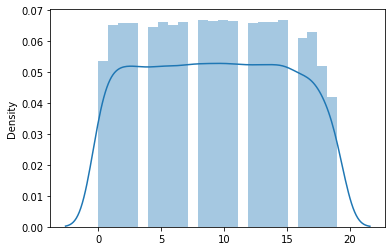

rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [6]:
sns.distplot(groups.target)
plp.show()

print(groups.target_names[groups.target[0]])
print(groups.data[0])

Possiamo utilizzare Bag of words per estrapolare il senso contenuto nel testo.
Creiamo una matrice dove le colonne rappresentano il numero di volte in cui la parola (colonna) ricorre nel documento (riga).

Utilizziamo CountVectorizer per creare la matrice

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)
print(data_count.toarray()[0])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 0 1 0 0 0 0
 0 3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 3 0 0 2 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 6 0 0 0 1 0 0 1 0 0 5 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 1 1 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Otteniamo le top features

In [8]:
print(count_vector.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'ago', 'all', 'already', 'also', 'always', 'am', 'american', 'an', 'and', 'andrew', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'armenian', 'around', 'article', 'as', 'ask', 'at', 'au', 'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but', 'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada', 'cannot', 'car', 'card', 'case', 'cc', 'center', 'change', 'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color', 'com', 'come', 'computer', 'control', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'de',

Notiamo che ci sono molti numeri e anche molte parole con scarso significato... Necessario preprocessing
## Text preprocessing

In [9]:
def is_letter_only(word):
    return word.isalpha()

data_cleaned = []
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split() if is_letter_only(word))
    data_cleaned.append(doc_cleaned)
print(data_cleaned)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Le **stop words** disturbano il risultato di BoW è quindi necessario eliminarle.

In [10]:
from sklearn.feature_extraction import _stop_words
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
#print(_stop_words.ENGLISH_STOP_WORDS)

all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words='english', max_features=500)
lemmatizer = WordNetLemmatizer()
for doc in groups.data:
    data_cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in doc.split() if is_letter_only(word) and word not in all_names]))

data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
print(count_vector_sw.get_feature_names())
print(len(count_vector_sw.get_feature_names()))

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'attack', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'close', 'code', 'college', 'color', 'come', 'coming', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'create', 'crime', 'current', 'currently', 'cut', 'data', 'david', 'day', 'db', 'deal',

Abbiamo convertito il testo di ogni documento di newsgroup in un vettore sparso di dimensione 500.

Questi 500 token sono scelti in base al loro overall, dopo una fase di preprocessing (rimozione stopword, stemming e
lemmatization).

Adesso dobbiamo chiederci se il vettore di occorrenze è sufficientemente rappresentativo o
trasmette informazioni sufficienti da poter essere utilizzato per differenziare il documento stesso dai documenti
relativi ad altri argomenti?

Possiamo rispondere a queste domande rappresentando il vettore. Se i documenti correlati sono vicini.

**Problema**: il vettore ha 500 dimensioni e noi possiamo rappresentarne al massimo tre.

**Soluzione**: t-SNE reduction.

**Dimensionality Reduction**: è una tecnica di ML che minimizza il numero di feauture cercarcando di conservare il più
alto numero di informazioni.

**t-distributed Stochastic Neighbor Embedding**: è una tecnica non lineare di dimensionality reduction.
Si compone in due fasi:

1- Nella prima fase viene costruita una distribuzione di probabilità che ad ogni coppia di punti nello spazio originale
ad alta dimensionalità associa un valore di probabilità elevato se i due punti sono simili, basso se sono dissimili;

2- viene definita una seconda distribuzione di probabilità analoga, nello spazio a dimensione ridotta.


In [11]:
from sklearn.manifold import TSNE
#scegliamo tre categorie

categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

# applichiamo quello che abbiamo fatto nelle fasi precedenti riguardo la pulizia dei documenti.

all_names = set(names.words())
count_vector_sw_3 = CountVectorizer(stop_words='english', max_features=500)
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups_3.data:
    data_cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in doc.split() if is_letter_only(word) and word not in all_names]))

data_cleaned_count_3 = count_vector_sw_3.fit_transform(data_cleaned)
print(count_vector_sw_3.get_feature_names())
print(len(count_vector_sw_3.get_feature_names()))

['able', 'accept', 'access', 'according', 'act', 'activity', 'actually', 'add', 'address', 'agree', 'air', 'algorithm', 'american', 'analysis', 'animation', 'anonymous', 'answer', 'anybody', 'application', 'apr', 'archive', 'area', 'article', 'ask', 'asked', 'aspect', 'assume', 'astronaut', 'astronomy', 'attempt', 'available', 'away', 'bad', 'base', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'biblical', 'big', 'billion', 'bit', 'black', 'body', 'book', 'box', 'build', 'built', 'buy', 'ca', 'called', 'came', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certainly', 'change', 'check', 'child', 'christian', 'church', 'city', 'claim', 'code', 'color', 'come', 'comet', 'command', 'comment', 'commercial', 'common', 'communication', 'company', 'computer', 'computing', 'conference', 'consider', 'considered', 'contact', 'control', 'convert', 'copy', 'cost', 'couple', 'course', 'create', 'created', 'current', 'currently', 'cview', 'data', 'day', 'deal', 'degree', 'd

Applichiamo t-SNE per ridurre la matrice a 500 dimensioni in una matrice bidimensionale
<ul>
<li> n_components: numero di dimensioni </li>
<li> perplexity: numero di datapoint considerati vicini nell'algoritmo. (valore tipico tra 5 e 50)</li>
<li> random_state: seme per la riproducibilità del programma </li>
<li> learning_rate: fattore che influenza il processo di ricerca dello spazio di mappatura ottimale.
<br>(Valore tipico compreso tra 10 e 1.000)</li>

In [12]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

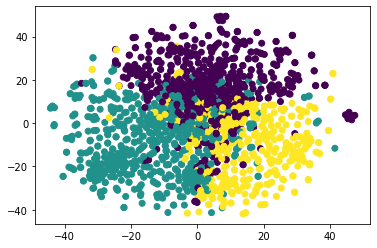

In [13]:
plp.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plp.show()


## Clustering e topic modelling
### Clustering
L'apprendimento non supervisionato identifica strutture intrinseche o punti in comune nei dati di input.<br>
Ha quindi la libertà di scoprire informazioni nascoste sotto i dati.<br>
Questo tipo di apprendimento puoi includere i seguenti tipi: <br>
<ul>
<li>Clustering: raggruppare dati sulle informazioni comuni;</li>
<li>Association: esplora la relazione tra due o più caratteristiche presenti nei dati. <br> Utilizzato spesso per
rilevare anomalie;</li>
<li>Projection: mappa lo spazio dell'elemento originale su uno spazio dimensionale ridotto conservando o estraendo un
insieme di variabili principali</li>
</ul>

#### k-means clustering
L'obiettivo di questo algoritmo è quello di partizionare in K gruppi i dati in base alle caratteristiche.<br>
Ogni cluster è caratterizzato da un **centroide** e ogni campione di dati appartiene al cluster con il centroide
più vicino.<br>
L'algoritmo prevede i seguenti steps:
<ol>
<li>Selezione di k: quanti cluster dobbiamo generare;</li>
<li>Inizializzazione dei centroidi: selezioniamo k sample come centroidi dal nostro dataset;</li>
<li>Assegnamo i dati al cluster: abbiamo k centroidi, i dati che condividono lo stesso centroide più vicino
costituiscono un cluster. <br> La distanza è tipicamente una distanza euclidea;</li>
<li>Aggiornamento dei centroidi;</li>
<li>Ripeti step 3 e 4 fino a quando i centroidi smettono di muoversi o si spostano poco, numero massimo di iterazioni.</li>
</ol>

L'output saranno k cluster con k centroidi. Nuovi sample saranno automaticamente associati al cluster con il centroide
più vicino.<br><br>
Importiamo KMeans

In [14]:
from sklearn.manifold import TSNE
#scegliamo tre categorie

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',]
groups = fetch_20newsgroups(subset='all',categories=categories)

# applichiamo quello che abbiamo fatto nelle fasi precedenti riguardo la pulizia dei documenti.

all_names = set(names.words())
count_vector_sw_5 = CountVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    data_cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in doc.split() if is_letter_only(word) and word not in all_names]))

data_cleaned_count_5 = count_vector_sw_5.fit_transform(data_cleaned)
print(count_vector_sw_5.get_feature_names())
print(len(count_vector_sw_5.get_feature_names()))

['aa', 'aah', 'aap', 'aarhus', 'aario', 'ab', 'abandon', 'abandoned', 'abbreviation', 'abc', 'abducted', 'abel', 'aberdeen', 'aberration', 'abetter', 'abg', 'abhor', 'abide', 'abiding', 'ability', 'abingdon', 'abiogenesis', 'ablaze', 'able', 'ablution', 'abo', 'aboard', 'abode', 'abolish', 'abolished', 'abolishment', 'abolition', 'abolitionist', 'abominable', 'abomination', 'abort', 'abortion', 'abrogated', 'abruptly', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolutism', 'absolutist', 'absorb', 'absorbed', 'absorbs', 'absorbtion', 'absorption', 'abstact', 'abstacted', 'abstinence', 'abstract', 'abstruse', 'absurd', 'absurdity', 'abu', 'abundance', 'abundantly', 'abuse', 'abused', 'abuser', 'abyss', 'ac', 'academic', 'academy', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accepted', 'accepting', 'accepts', 'accesible', 'access', 'accessed', 'accessible', 'accessing', 'accident', 'accidental', 'accidentally', 'accide

In [15]:
from sklearn.cluster import KMeans
#pagina 88 per tutti gli altri parametri
k = 4
kmeans_sk = KMeans(n_clusters=k, random_state=42)
kmeans_sk.fit(data_cleaned_count_5)
clusters = kmeans_sk.labels_

from collections import Counter
print(Counter(clusters))

Counter({3: 3365, 0: 12, 1: 7, 2: 3})


Notiamo che i clusters sono sbilanciati in quando abbiamo 3365 documenti nel cluster 3. Questo è dovuto al fatto che
affidarci totalmente alla frequenza delle parole in un testo non è sufficientemente rappresentativo. <br>
La soluzione è aggiungere un valore detto **inverse document frequency** che assegna ad ogni termine frequenza un
fattore di peso inversamente proporzionale alla frequenza del documento.<br>

Rieseguiamo il codice utilizzando tf-idf invece di countvector.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
groups = fetch_20newsgroups(subset='all',categories=categories)

# applichiamo quello che abbiamo fatto nelle fasi precedenti riguardo la pulizia dei documenti.
labels = groups.target
label_names = groups.target_names
all_names = set(names.words())
tf_idf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    data_cleaned.append(' '.join([lemmatizer.lemmatize(word.lower()) for word in doc.split() if is_letter_only(word) and word not in all_names]))

data_cleaned_count_4 = tf_idf_vector.fit_transform(data_cleaned)
print(tf_idf_vector.get_feature_names())
print(len(tf_idf_vector.get_feature_names()))

['aa', 'aah', 'aap', 'aarhus', 'aario', 'ab', 'abandon', 'abandoned', 'abbreviation', 'abc', 'abducted', 'abel', 'aberdeen', 'aberration', 'abetter', 'abg', 'abhor', 'abide', 'abiding', 'ability', 'abingdon', 'abiogenesis', 'ablaze', 'able', 'ablution', 'abo', 'aboard', 'abode', 'abolish', 'abolished', 'abolishment', 'abolition', 'abolitionist', 'abominable', 'abomination', 'abort', 'abortion', 'abrogated', 'abruptly', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolutism', 'absolutist', 'absorb', 'absorbed', 'absorbs', 'absorbtion', 'absorption', 'abstact', 'abstacted', 'abstinence', 'abstract', 'abstruse', 'absurd', 'absurdity', 'abu', 'abundance', 'abundantly', 'abuse', 'abused', 'abuser', 'abyss', 'ac', 'academic', 'academy', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accepted', 'accepting', 'accepts', 'accesible', 'access', 'accessed', 'accessible', 'accessing', 'accident', 'accidental', 'accidentally', 'accide

In [17]:
from sklearn.cluster import KMeans
#pagina 88 per tutti gli altri parametri
k = 4
kmeans_sk = KMeans(n_clusters=k, random_state=42)
kmeans_sk.fit(data_cleaned_count_4)
clusters = kmeans_sk.labels_

from collections import Counter
print(Counter(clusters))

Counter({0: 1389, 1: 848, 2: 673, 3: 477})


In [18]:
cluster_label = {i:labels[np.where(clusters == i)] for i in range(k)}
terms = tf_idf_vector.get_feature_names()
centroids = kmeans_sk.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_names[label_index], count))
        print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print(' %s' % terms[ind], end="")
    print()

cluster_0: 1389 samples
sci.space: 468 samples
Top 10 terms:
comp.graphics: 324 samples
Top 10 terms:
talk.religion.misc: 300 samples
Top 10 terms:
alt.atheism: 297 samples
Top 10 terms:
 world new computer know like ha just university article wa
cluster_1: 848 samples
alt.atheism: 498 samples
Top 10 terms:
talk.religion.misc: 327 samples
Top 10 terms:
sci.space: 17 samples
Top 10 terms:
comp.graphics: 6 samples
Top 10 terms:
 believe just moral morality article think say people wa god
cluster_2: 673 samples
comp.graphics: 642 samples
Top 10 terms:
sci.space: 27 samples
Top 10 terms:
alt.atheism: 3 samples
Top 10 terms:
talk.religion.misc: 1 samples
Top 10 terms:
 know thanks need format looking university program file graphic image
cluster_3: 477 samples
sci.space: 475 samples
Top 10 terms:
alt.atheism: 1 samples
Top 10 terms:
comp.graphics: 1 samples
Top 10 terms:
 zoology just moon nasa hst mission wa launch shuttle space


### Topic modelling
Il topic model è un modello statistico per calcolare la distribuzione di probabilità che una parola sia collegata
all'argomento.
È usato ampiamente per la ricerca di contenuti semantici nascosti.<br>
Due principali algoritmi:
<ol>
<li> Non negative matrix factorization (NMF): si basa sull'algebra. L'idea è quella di fattorizzare la matrice presa in
input V, in due matrici più piccole W e H. Queste tre matrici hanno valori non negativi.<br>
Le tre matrici hanno i seguenti significati:
<ol>
<li>
V: è la matrice presa in input, contiene la term frequency o la tf-idf, ha dimensione n*m dove n rappresenta il
numero di documenti ed m il numero di termini.
</li>
<li>
W: la prima decomposizione, è la matrice delle caratteristiche, di dimensione t*m dove t rappresenta il numero di topics.
<br> Ogni riga di W rappresenta il topics ed ogni elemento rappresenta il rank del termine nel topic.
</li>
<li>
H: la matrice dei coefficienti, di dimensione n*t. Ogni riga rappresenta il documento mentre il valore contenuto
nell'elemento rappresenta il peso del topic nel documento.
</li>
</ol>
</li>
<li>
</li>
</ol>

In [24]:
from sklearn.decomposition import NMF
t = 20
#pagina 98 per tutti gli attributi.
nmf = NMF(n_components=t, random_state=42)
data = count_vector.fit_transform(data_cleaned)
nmf.fit(data)

/Users/francescofranco/PycharmProjects/BookExample/venv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=20, random_state=42)

In [25]:
nmf.components_

array([[0.35616418, 0.17673331, 0.08472488, ..., 0.        , 0.        ,
        0.        ],
       [0.47091149, 0.45557068, 0.176594  , ..., 0.        , 0.45206143,
        0.00602811],
       [0.18911371, 0.08025452, 0.22470241, ..., 0.06268866, 0.16910646,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04471117, 0.        ,
        0.        ],
       [0.07511109, 0.        , 0.        , ..., 0.02334037, 0.06010027,
        0.        ],
       [0.00395225, 0.        , 0.55550663, ..., 0.        , 0.03554701,
        0.        ]])

In [26]:
terms = count_vector.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic {}: ".format(topic_idx))
    print(' '.join([terms[i] for i in topic.argsort()[-10:]]))

Topic 0: 
area religion quote god child where great general including kind
Topic 1: 
same why type hard might large high know lord person
Topic 2: 
even view seems quote high going part including area different
Topic 3: 
doing church you those high evidence possible no technical sure
Topic 4: 
usa person single whole shuttle when note spacecraft mar ha
Topic 5: 
where information already way high support different question until including
Topic 6: 
go including my sort only rocket general mean someone he
Topic 7: 
know flight at available file large single atheism event ha
Topic 8: 
often time different come sound high code talking simple library
Topic 9: 
under shuttle you working universe single discussion often either whole
Topic 10: 
them quote never it tin number book start now talking
Topic 11: 
money high government test moon than been various trying planet
Topic 12: 
no evidence post our talking those model maybe never public
Topic 13: 
working available religious few wa usa gm